<a href="https://colab.research.google.com/github/PabloAA007/ATSO-Algorithmic-Trading-Strategy-Optimization/blob/nick/Prophet_Model_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet
!pip install hvplot
!pip install holoviews

In [ ]:
import pandas as pd
import datetime as dt
import holoviews as hv
from prophet import Prophet

%matplotlib inline

In [ ]:
# Upload the AAPL_stock_price.csv file
from google.colab import files
uploaded = files.upload()

Saving AAPL_stock_price.csv to AAPL_stock_price (1).csv


In [ ]:
# Read csv file as DataFrame, with the first column as row index
df = pd.read_csv("AAPL_stock_price.csv",
                 index_col="Date",
                 infer_datetime_format=True,
                 parse_dates=True
                )

# Drop columns that won't be used
df = df.drop(columns=["Open", "High", "Low", "Volume"], axis=1)

# Preview the dataset
df.head()

,Close
Date,
2020-07-27,94.81
2020-07-28,93.25
2020-07-29,95.04
2020-07-30,96.19
2020-07-31,106.26


<Axes: xlabel='Date'>

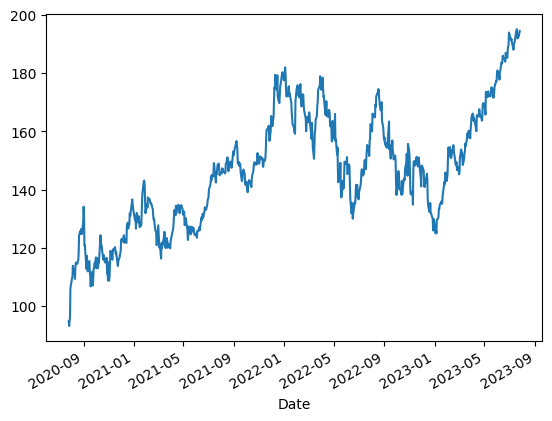

In [ ]:
df["Close"].plot()

In [ ]:
# Reset the index so that we recode the columns for Prophet
df = df.reset_index()

In [ ]:
#Set the columns to readable Prophet labels
df.columns = ["ds", "y"]

In [ ]:
# Sort the DataFrame by `ds` and in ascending order
df = df.sort_values(by=["ds"], ascending=True)

display(df.head(5))
display(df.tail(5))

,ds,y
0,2020-07-27,94.81
1,2020-07-28,93.25
2,2020-07-29,95.04
3,2020-07-30,96.19
4,2020-07-31,106.26


,ds,y
750,2023-07-20,193.13
751,2023-07-21,191.94
752,2023-07-24,192.75
753,2023-07-25,193.62
754,2023-07-26,194.50


In [ ]:
# Call the Prophet function, and store as an object
model = Prophet()
model

In [ ]:
# Fit the Prophet model.
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpatinxkdv/u5kxyb2z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpatinxkdv/x_bss1xn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92914', 'data', 'file=/tmp/tmpatinxkdv/u5kxyb2z.json', 'init=/tmp/tmpatinxkdv/x_bss1xn.json', 'output', 'file=/tmp/tmpatinxkdv/prophet_modelf2prazj8/prophet_model-20230803022631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:26:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:26:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create the future dataframe to hold predictions
future_trends = model.make_future_dataframe(periods=30, freq="D")

# View rows of the predictions
future_trends.tail()

,ds
780,2023-08-21
781,2023-08-22
782,2023-08-23
783,2023-08-24
784,2023-08-25


In [ ]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_trends = model.predict(future_trends)

# Display the rows of the dataframe
forecast_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-27,98.901067,96.783101,110.796962,98.901067,98.901067,4.631499,4.631499,4.631499,1.010253,1.010253,1.010253,3.621245,3.621245,3.621245,0.0,0.0,0.0,103.532566
1,2020-07-28,99.068422,97.364293,111.047351,99.068422,99.068422,4.980332,4.980332,4.980332,0.857521,0.857521,0.857521,4.122811,4.122811,4.122811,0.0,0.0,0.0,104.048754
2,2020-07-29,99.235776,97.497871,111.256654,99.235776,99.235776,5.526182,5.526182,5.526182,0.871431,0.871431,0.871431,4.654752,4.654752,4.654752,0.0,0.0,0.0,104.761959
3,2020-07-30,99.403131,98.531977,112.384109,99.403131,99.403131,6.066160,6.066160,6.066160,0.850814,0.850814,0.850814,5.215347,5.215347,5.215347,0.0,0.0,0.0,105.469291
4,2020-07-31,99.570485,99.312115,112.806270,99.570485,99.570485,6.647302,6.647302,6.647302,0.845185,0.845185,0.845185,5.802117,5.802117,5.802117,0.0,0.0,0.0,106.217788


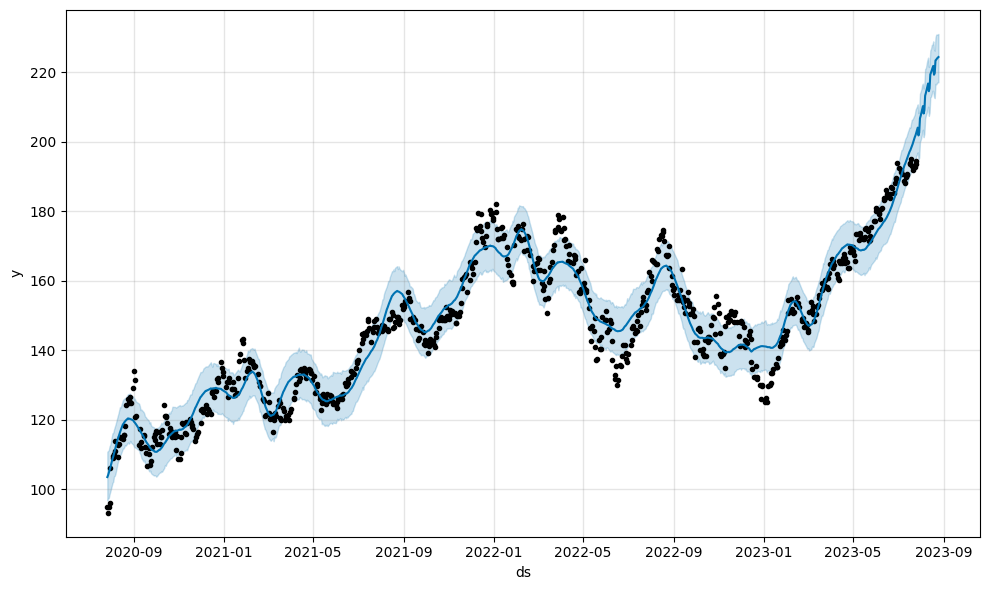

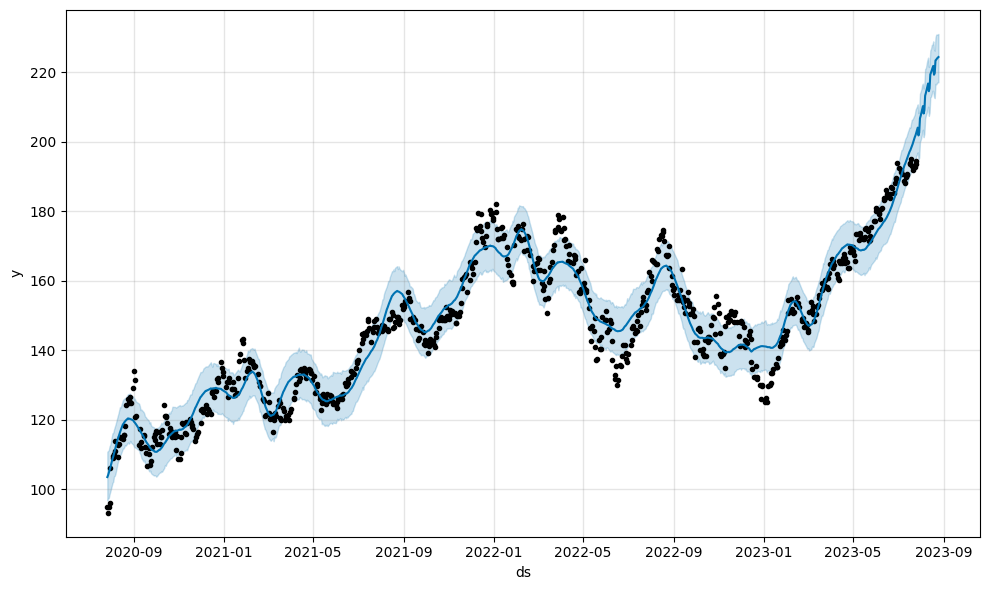

In [ ]:
model.plot(forecast_trends)

In [ ]:
forecast_trends_1 = forecast_trends.set_index(["ds"])
forecast_trends_1

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2020-07-27,98.901067,96.783101,110.796962,98.901067,98.901067,4.631499,4.631499,4.631499,1.010253,1.010253,1.010253,3.621245,3.621245,3.621245,0.0,0.0,0.0,103.532566
2020-07-28,99.068422,97.364293,111.047351,99.068422,99.068422,4.980332,4.980332,4.980332,0.857521,0.857521,0.857521,4.122811,4.122811,4.122811,0.0,0.0,0.0,104.048754
2020-07-29,99.235776,97.497871,111.256654,99.235776,99.235776,5.526182,5.526182,5.526182,0.871431,0.871431,0.871431,4.654752,4.654752,4.654752,0.0,0.0,0.0,104.761959
2020-07-30,99.403131,98.531977,112.384109,99.403131,99.403131,6.066160,6.066160,6.066160,0.850814,0.850814,0.850814,5.215347,5.215347,5.215347,0.0,0.0,0.0,105.469291
2020-07-31,99.570485,99.312115,112.806270,99.570485,99.570485,6.647302,6.647302,6.647302,0.845185,0.845185,0.845185,5.802117,5.802117,5.802117,0.0,0.0,0.0,106.217788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-21,206.577739,216.682591,230.060477,206.035034,207.001919,16.843463,16.843463,16.843463,1.010253,1.010253,1.010253,15.833210,15.833210,15.833210,0.0,0.0,0.0,223.421202
2023-08-22,206.872694,216.509667,230.843007,206.282939,207.330978,16.759070,16.759070,16.759070,0.857521,0.857521,0.857521,15.901549,15.901549,15.901549,0.0,0.0,0.0,223.631764
2023-08-23,207.167650,216.862875,230.870266,206.545220,207.680550,16.787901,16.787901,16.787901,0.871431,0.871431,0.871431,15.916471,15.916471,15.916471,0.0,0.0,0.0,223.955551
